In [5]:
# import numpy as np
# from scipy.spatial import ConvexHull

# # 定义 21×维度 数据
# data = np.array([
#     [10, 16, 10],
#     [16, 13, 14],
#     [17, 16, 16],
#     [12, 18, 11],
#     [17, 17, 10],
#     [11, 12, 15],
#     [15, 18, 13],
#     [13, 18, 14],
#     [17, 13, 11],
#     [18, 16, 16],
#     [11, 12, 13],
#     [17, 10, 12],
#     [17, 13, 10],
#     [15, 18, 11],
#     [11, 10, 10],
#     [18, 10, 18],
#     [10, 10, 17],
#     [18, 11, 16],
#     [15, 12, 10],
#     [16, 11, 13],
#     [17, 15, 15]
# ])

# # 计算凸包
# hull = ConvexHull(data)

# # 输出凸包的顶点索引和顶点坐标
# print("凸包顶点的索引:", hull.vertices)
# print("凸包顶点的坐标:")
# print(data[hull.vertices])

凸包顶点的索引: [ 0  2  3  4  6  7  9 11 12 13 14 15 16 17]
凸包顶点的坐标:
[[10 16 10]
 [17 16 16]
 [12 18 11]
 [17 17 10]
 [15 18 13]
 [13 18 14]
 [18 16 16]
 [17 10 12]
 [17 13 10]
 [15 18 11]
 [11 10 10]
 [18 10 18]
 [10 10 17]
 [18 11 16]]


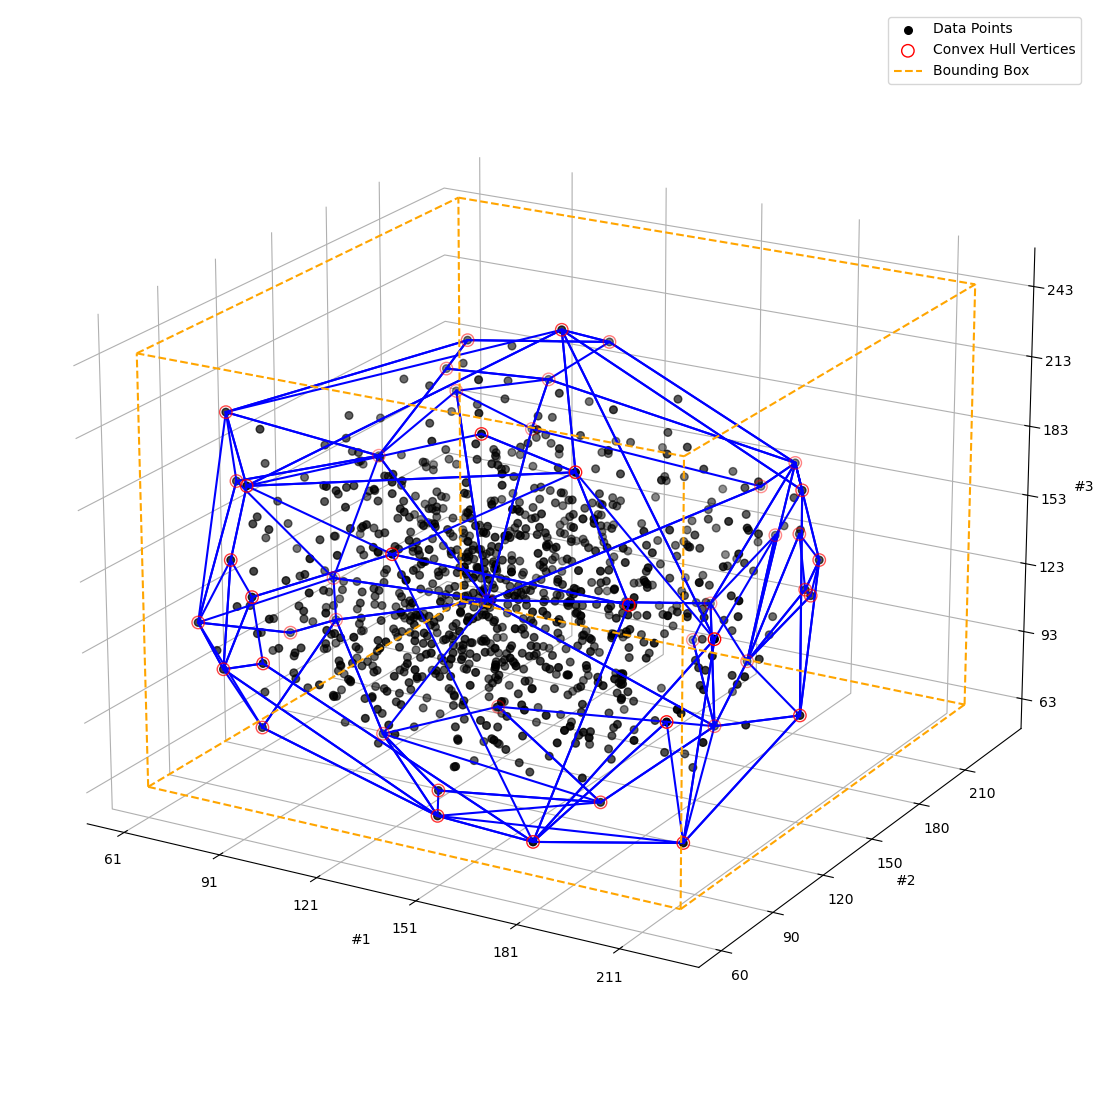

3D Data Points (MaxNum):
[[127 167 161]
 [131 131 140]
 [125 135  93]
 ...
 [138  85 153]
 [175 120 135]
 [161 121  96]]

Extreme Points (Convex Hull Vertices):
[[ 78 220  75]
 [ 96 127  64]
 [ 96 214 160]
 [ 85  66 164]
 [221 131 108]
 [ 64 157  91]
 [144  97 219]
 [171 230 158]
 [169 222 129]
 [ 84 186 195]
 [146 138 246]
 [200 177 134]
 [ 67  78 127]
 [210  75 129]
 [170 203  82]
 [208  89  71]
 [ 95  60 154]
 [170 115  63]
 [ 98  60 127]
 [205 170 136]
 [144 232  87]
 [ 81 197 180]
 [ 86  79  87]
 [136  63 182]
 [ 61 161 107]
 [ 98 173 216]
 [ 65 130  98]
 [ 91  65 197]
 [205 175 149]
 [222  78 165]
 [146 217  78]
 [103 211 185]
 [186 202 143]
 [133  92  68]
 [ 63 184 152]
 [171 181  64]
 [112 164  63]
 [ 68  93 210]
 [ 63 106 174]
 [201  71 176]
 [128 200 212]
 [175  91 214]
 [202 170 180]
 [158 235 142]
 [179  60  77]
 [145  70  72]
 [ 82  66 117]]

Nominal Probabilities for Each Extreme Point:
[0.003 0.03  0.033 0.01  0.021 0.003 0.038 0.003 0.016 0.015 0.004 0.039
 0.014 0.034 

In [7]:
import random
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

random.seed(42)      # 设置 Python random 的随机种子
np.random.seed(42)   # 设置 NumPy 的随机种子

# Step 1: Define input data
# W = 9  # Number of windows
window_data = [134,	175,	130,	130,	126,	149,	160,	84,	164,	102,	124,	133,	135,	110,	130,	108,	139,	114,	80,	144,	133,	116,	135,	108,	77,	140,	168,	132,	134,	131,	125,	115,	141,	112,	132,	132,	116,	182,	105,	122,	95,	177,	87,	143,	140,	166,	115,	109,	113,	103,	125,	149,	132,	133,	133,	206,	129,	81,	81,	170,	105,	84,	158,	130,	132,	103,	67,	204,	101,	164,	166,	129,	107,	132,	157,	183,	198,	86,	92,	168,	169,	186,	97,	127,	136,	135,	143,	86,	156,	102,	117,	202,	142,	150,	124,	134,	180,	85,	64,	116,	84,	170,	161,	116,	131,	116,	138,	81,	128,	129,	131,	101,	167,	110,	125,	185,	169,	66,	130,	98,	132,	130,	79,	118,	139,	129,	163,	108,	170,	150,	146,	148,	165,	124,	125,	130,	140,	169,	122,	106,	140,	163,	127,	124,	103,	111,	188,	134,	144,	117,	160,	101,	137,	116,	146,	132,	196,	105,	148,	134,	117,	90,	134,	121,	77,	149,	164,	86,	142,	114,	162,	102,	92,	92,	106,	95,	163,	156,	177,	135,	86,	105,	135,	130,	122,	153,	139,	110,	149,	145,	106,	191,	200,	137,	110,	121,	197,	185,	112,	142,	154,	121,	96,	182,	164,	150,	153,	170,	116,	129,	92,	164,	123,	136,	128,	87,	93,	69,	167,	169,	151,	93,	82,	68,	93,	157,	129,	110,	113,	127,	151,	129,	101,	78,	113,	128,	99,	173,	159,	125,	144,	145,	153,	136,	137,	122,	121,	143,	184,	160,	123,	87,	158,	87,	109,	90,	165,	126,	113,	158,	125,	151,	115,	68,	175,	106,	148,	155,	131,	135,	130,	82,	168,	153,	150,	148,	180,	149,	137,	174,	146,	95,	152,	156,	118,	81,	113,	146,	159,	97,	79,	155,	142,	124,	176,	79,	161,	81,	141,	146,	116,	203,	125,	136,	127,	139,	111,	80,	140,	118,	138,	133,	137,	80,	127,	163,	120,	63,	146,	143,	124,	105,	172,	127,	173,	170,	146,	151,	90,	134,	130,	170,	94,	96,	157,	141,	190,	171,	128,	133,	157,	127,	131,	92,	119,	167,	132,	97,	107,	129,	98,	144,	190,	121,	95,	107,	136,	112,	178,	133,	145,	132,	136,	103,	196,	131,	136,	132,	96,	136,	98,	128,	103,	163,	147,	143,	171,	95,	110,	136,	111,	145,	95,	131,	96,	185,	101,	125,	98,	163,	136,	158,	157,	136,	159,	230,	178,	151,	130,	156,	79,	111,	212,	137,	141,	176,	153,	205,	129,	74,	114,	116,	91,	110,	174,	126,	107,	133,	128,	85,	172,	159,	142,	74,	150,	130,	126,	160,	153,	127,	127,	221,	171,	117,	137,	142,	99,	157,	194,	164,	109,	152,	98,	199,	212,	162,	176,	167,	128,	77,	147,	134,	134,	140,	167,	93,	121,	136,	136,	132,	104,	120,	160,	128,	123,	137,	118,	163,	150,	121,	68,	173,	129,	166,	150,	176,	173,	124,	149,	114,	120,	156,	104,	192,	127,	157,	110,	77,	95,	144,	82,	158,	156,	156,	133,	98,	153,	157,	125,	169,	133,	146,	203,	94,	188,	130,	208,	147,	181,	104,	137,	79,	209,	177,	152,	166,	83,	141,	106,	98,	99,	119,	132,	112,	121,	91,	178,	142,	176,	146,	132,	175,	137,	106,	128,	116,	130,	110,	134,	79,	126,	176,	91,	138,	183,	92,	82,	149,	106,	155,	146,	117,	127,	121,	118,	130,	103,	120,	109,	147,	135,	148,	78,	115,	118,	138,	126,	134,	173,	153,	107,	153,	150,	219,	187,	140,	96,	149,	140,	120,	120,	180,	111,	153,	143,	108,	117,	142,	88,	96,	170,	122,	126,	127,	149,	132,	128,	125,	111,	133,	90,	126,	95,	104,	98,	95,	149,	104,	164,	206,	126,	118,	140,	145,	140,	109,	125,	151,	175,	122,	134,	99,	98,	155,	130,	103,	60,	184,	145,	130,	170,	119,	118,	110,	84,	120,	163,	74,	105,	97,	100,	160,	119,	118,	142,	120,	120,	145,	157,	220,	143,	113,	149,	122,	71,	97,	109,	122,	159,	161,	122,	150,	101,	73,	125,	116,	150,	93,	70,	117,	100,	101,	138,	86,	129,	133,	94,	112,	175,	142,	170,	88,	143,	129,	164,	126,	164,	112,	105,	68,	149,	123,	143,	100,	109,	94,	173,	134,	165,	103,	129,	135,	107,	151,	169,	186,	140,	132,	104,	204,	82,	138,	137,	130,	190,	135,	138,	108,	117,	131,	138,	150,	166,	123,	111,	194,	78,	110,	93,	128,	91,	206,	146,	121,	101,	148,	133,	170,	141,	127,	160,	148,	171,	77,	63,	126,	133,	114,	143,	186,	158,	190,	136,	136,	103,	124,	123,	109,	145,	179,	88,	139,	123,	133,	120,	106,	157,	145,	93,	114,	124,	189,	109,	139,	162,	165,	148,	155,	162,	188,	142,	108,	65,	149,	146,	113,	127,	118,	87,	212,	98,	79,	128,	169,	72,	162,	152,	85,	122,	155,	134,	167,	148,	214,	102,	206,	145,	138,	76,	77,	165,	147,	99,	159,	130,	127,	110,	148,	148,	119,	139,	111,	146,	108,	98,	109,	118,	120,	180,	99,	112,	147,	148,	112,	118,	106,	195,	87,	165,	164,	123,	95,	119,	143,	93,	133,	177,	155,	138,	80,	115,	114,	129,	196,	133,	81,	110,	125,	114,	150,	177,	129,	111,	102,	86,	110,	114,	134,	162,	106,	113,	95,	120,	149,	74,	115,	121,	185,	125,	100,	121,	169,	172,	99,	186,	166,	191,	131,	131,	114,	170,	152,	164,	116,	169,	148,	91,	179,	124,	151,	116,	112,	162,	101,	151,	149,	151,	106,	126,	108,	74,	103,	77,	181,	175,	113,	139,	138,	163,	146,	198,	113,	174,	131,	190,	70,	129,	133,	165,	88,	167,	123,	159,	99,	106,	124,	115,	120,	94,	115,	141,	158,	109,	142,	85,	67,	133,	158,	121,	100,	91,	179,	179,	117,	100,	154,	164,	115,	76,	98,	126,	142,	71,	127,	65,	144,	135,	74,	127,	113,	208,	153,	132,	137,	103,	160,	112,	125,	76,	115,	149,	176,	99,	99,	177,	165,	111,	117,	109,	184,	109,	126,	141,	76,	120,	117,	137,	113,	152,	93,	126,	146,	171,	120,	119,	132,	139,	143,	135,	77,	72,	142,	166,	96,	161,	131,	157,	158,	134,	100,	143,	100,	163,	178,	163,	148,	142,	120,	140,	139,	134,	103,	82,	193,	92,	218,	180,	175,	133,	127,	154,	133,	118,	159,	143,	145,	108,	126,	181,	97,	195,	135,	178,	154,	173,	67,	177,	74,	157,	222,	134,	126,	172,	102,	154,	112,	88,	181,	134,	151,	108,	134,	128,	129,	164,	126,	116,	132,	143,	128,	165,	100,	130,	170,	127,	78,	117,	129,	181,	75,	169,	138,	148,	164,	108,	118,	66,	82,	131,	71,	131,	144,	154,	122,	134,	133,	175,	101,	187,	127,	155,	121,	80,	83,	128,	109,	162,	143,	91,	138,	134,	152,	166,	189,	174,	134,	135,	169,	105,	61,	132,	98,	133,	131,	157,	67,	168,	108,	133,	125,	138,	89,	111,	149,	162,	162,	112,	143,	168,	173,	115,	60,	167,	139,	130,	84,	124,	181,	202,	126,	151,	83,	124,	141,	129,	142,	129,	84,	107,	84,	122,	217,	146,	123,	184,	199,	156,	147,	137,	106,	143,	134,	164,	136,	89,	160,	116,	127,	136,	166,	141,	155,	121,	168,	130,	123,	92,	133,	146,	130,	181,	96,	88,	174,	86,	148,	157,	124,	83,	103,	86,	127,	124,	128,	161,	148,	74,	150,	165,	102,	135,	129,	158,	176,	127,	168,	111,	131,	148,	96,	166,	125,	110,	161,	90,	107,	103,	142,	166,	108,	164,	142,	171,	147,	143,	195,	101,	88,	156,	206,	141,	79,	109,	121,	121,	133,	205,	117,	110,	114,	87,	186,	115,	112,	133,	117,	132,	78,	177,	167,	161,	201,	119,	119,	128,	127,	114,	138,	88,	113,	121,	169,	98,	78,	125,	128,	154,	127,	109,	146,	124,	82,	126,	190,	142,	105,	91,	91,	145,	157,	82,	197,	141,	127,	178,	108,	148,	160,	149,	174,	104,	197,	88,	185,	177,	122,	138,	98,	114,	122,	127,	166,	163,	119,	176,	170,	69,	213,	109,	147,	104,	117,	116,	161,	141,	102,	128,	189,	112,	98,	117,	76,	178,	178,	157,	110,	146,	125,	178,	131,	174,	128,	115,	202,	124,	158,	127,	130,	126,	95,	104,	129,	172,	152,	128,	134,	108,	146,	93,	95,	125,	112,	101,	113,	122,	149,	112,	150,	91,	121,	79,	80,	156,	126,	185,	125,	202,	76,	111,	75,	95,	124,	132,	75,	169,	180,	105,	81,	121,	116,	88,	122,	101,	139,	219,	135,	199,	118,	112,	154,	81,	62,	134,	132,	114,	149,	115,	70,	108,	122,	85,	172,	128,	139,	136,	142,	100,	111,	123,	175,	134,	124,	119,	193,	80,	104,	110,	173,	193,	129,	184,	149,	127,	113,	143,	181,	123,	175,	137,	168,	115,	156,	179,	146,	154,	104,	165,	118,	115,	154,	114,	152,	201,	117,	164,	113,	117,	92,	199,	185,	160,	222,	126,	110,	134,	149,	144,	139,	157,	126,	120,	119,	125,	126,	98,	140,	70,	139,	144,	126,	102,	136,	126,	145,	169,	158,	149,	89,	102,	144,	128,	122,	105,	63,	121,	104,	139,	69,	156,	197,	122,	148,	110,	130,	125,	114,	152,	188,	96,	91,	153,	156,	157,	128,	147,	116,	141,	161,	155,	95,	103,	125,	130,	106,	125,	127,	115,	159,	82,	83,	122,	122,	98,	104,	142,	147,	85,	132,	134,	175,	195,	89,	120,	186,	118,	126,	163,	135,	195,	232,	138,	105,	185,	76,	128,	158,	130,	99,	117,	153,	121,	134,	129,	171,	142,	107,	114,	126,	210,	132,	166,	106,	144,	142,	165,	175,	142,	89,	134,	168,	156,	126,	121,	107,	145,	132,	140,	100,	114,	132,	97,	144,	160,	111,	141,	158,	151,	123,	172,	112,	138,	104,	120,	86,	101,	136,	176,	185,	106,	182,	152,	142,	91,	165,	168,	164,	108,	121,	132,	122,	115,	107,	176,	183,	117,	170,	108,	133,	170,	177,	168,	135,	153,	117,	137,	170,	134,	130,	184,	121,	77,	138,	119,	151,	112,	121,	150,	124,	96,	138,	151,	129,	147,	149,	179,	167,	86,	180,	134,	166,	111,	185,	168,	114,	143,	157,	75,	173,	135,	160,	103,	130,	197,	134,	143,	142,	118,	65,	153,	209,	111,	110,	109,	122,	116,	156,	121,	121,	118,	184,	130,	81,	133,	128,	115,	115,	174,	96,	178,	161,	115,	118,	130,	141,	122,	136,	128,	229,	145,	163,	109,	77,	97,	115,	127,	60,	162,	180,	170,	121,	88,	105,	138,	164,	116,	115,	122,	110,	112,	130,	167,	113,	96,	196,	100,	77,	96,	74,	142,	146,	109,	117,	134,	122,	183,	183,	82,	143,	118,	189,	120,	217,	141,	101,	124,	193,	182,	84,	137,	109,	63,	143,	128,	177,	137,	149,	63,	106,	101,	128,	80,	123,	125,	134,	144,	141,	185,	189,	120,	108,	86,	200,	78,	134,	105,	107,	121,	144,	88,	131,	115,	106,	160,	96,	148,	153,	108,	171,	101,	153,	121,	182,	66,	122,	143,	195,	160,	177,	187,	97,	104,	105,	141,	142,	153,	92,	136,	121,	135,	121,	175,	169,	132,	120,	154,	110,	112,	114,	98,	103,	171,	171,	110,	99,	123,	113,	169,	90,	172,	113,	183,	141,	173,	138,	160,	96,	119,	167,	192,	186,	160,	176,	80,	108,	136,	160,	110,	91,	128,	177,	141,	89,	96,	129,	134,	132,	128,	136,	111,	148,	125,	148,	175,	123,	86,	156,	109,	135,	92,	165,	107,	77,	158,	101,	112,	108,	119,	105,	83,	190,	63,	120,	115,	106,	193,	93,	205,	97,	140,	124,	156,	154,	153,	96,	93,	191,	137,	111,	142,	109,	200,	140,	157,	156,	101,	102,	118,	99,	170,	162,	115,	109,	173,	146,	149,	139,	161,	155,	142,	147,	109,	116,	181,	140,	175,	167,	130,	140,	146,	151,	113,	76,	114,	164,	146,	170,	139,	131,	123,	170,	124,	97,	134,	141,	120,	98,	176,	138,	172,	115,	119,	188,	123,	137,	102,	146,	88,	97,	65,	98,	180,	129,	133,	150,	125,	92,	168,	128,	139,	172,	209,	126,	138,	132,	106,	188,	115,	108,	147,	128,	113,	119,	182,	109,	154,	110,	143,	181,	95,	116,	93,	137,	153,	131,	96,	98,	74,	136,	125,	182,	163,	116,	200,	138,	165,	123,	131,	102,	139,	115,	106,	123,	126,	158,	121,	112,	130,	177,	139,	163,	171,	128,	96,	134,	159,	158,	120,	152,	108,	122,	96,	146,	95,	109,	145,	162,	116,	104,	154,	109,	165,	163,	150,	108,	140,	97,	119,	109,	163,	65,	154,	140,	120,	109,	208,	151,	129,	100,	149,	145,	81,	86,	150,	129,	96,	121,	143,	104,	156,	87,	97,	102,	150,	87,	75,	145,	151,	131,	144,	74,	146,	127,	126,	137,	136,	86,	140,	112,	142,	205,	177,	154,	128,	166,	133,	131,	118,	149,	142,	133,	136,	163,	103,	120,	191,	158,	154,	101,	138,	152,	125,	122,	85,	67,	204,	141,	129,	108,	135,	195,	156,	88,	156,	142,	114,	185,	132,	159,	130,	117,	106,	97,	190,	171,	134,	106,	95,	141,	119,	128,	159,	98,	108,	148,	91,	215,	126,	89,	125,	143,	144,	126,	69,	96,	117,	177,	156,	109,	153,	161,	113,	149,	89,	166,	170,	197,	164,	140,	196,	132,	108,	166,	172,	165,	97,	146,	140,	105,	112,	104,	135,	184,	132,	138,	210,	141,	146,	145,	154,	123,	199,	127,	108,	171,	142,	129,	146,	140,	128,	78,	134,	119,	93,	110,	113,	78,	127,	156,	91,	128,	163,	115,	166,	143,	150,	64,	165,	133,	73,	111,	211,	115,	121,	190,	167,	127,	146,	183,	118,	119,	112,	205,	166,	109,	183,	119,	80,	125,	115,	155,	125,	178,	154,	77,	207,	151,	105,	148,	153,	106,	96,	89,	105,	173,	148,	128,	121,	108,	197,	109,	188,	120,	95,	157,	118,	137,	214,	76,	84,	138,	133,	95,	74,	69,	143,	89,	118,	129,	116,	70,	174,	65,	142,	158,	145,	123,	119,	142,	157,	158,	109,	159,	164,	203,	151,	117,	104,	172,	90,	127,	133,	133,	143,	211,	102,	156,	109,	92,	145,	122,	102,	107,	109,	135,	175,	168,	108,	126,	161,	63,	176,	169,	84,	93,	203,	153,	85,	102,	117,	136,	169,	228,	133,	153,	153,	114,	121,	180,	152,	121,	129,	99,	124,	136,	122,	190,	129,	111,	143,	122,	141,	138,	145,	144,	149,	145,	127,	138,	147,	129,	127,	150,	131,	64,	132,	122,	117,	205,	155,	183,	90,	126,	154,	127,	167,	111,	84,	118,	142,	183,	101,	175,	172,	101,	138,	188,	175,	117,	136,	123,	165,	103,	140,	76,	76,	141,	110,	107,	120,	107,	96,	106,	209,	114,	117,	156,	184,	129,	135,	167,	158,	110,	164,	79,	157,	140,	98,	150,	71,	151,	118,	98,	117,	200,	80,	97,	109,	130,	124,	88,	105,	129,	98,	114,	137,	98,	111,	142,	180,	171,	175,	129,	106,	107,	131,	121,	143,	153,	151,	110,	135,	135,	104,	166,	65,	143,	108,	165,	142,	135,	147,	134,	146,	139,	136,	217,	99,	163,	129,	162,	92,	141,	155,	104,	119,	108,	127,	187,	155,	131,	151,	101,	100,	149,	106,	95,	150,	107,	131,	147,	89,	194,	154,	137,	113,	173,	147,	142,	114,	161,	179,	127,	132,	118,	152,	72,	131,	108,	116,	134,	153,	117,	136,	145,	121,	112,	118,	155,	152,	148,	113,	162,	184,	178,	130,	81,	87,	76,	102,	90,	102,	112,	197,	158,	150,	167,	87,	139,	104,	131,	138,	235,	103,	104,	165,	70,	136,	139,	179,	209,	179,	105,	148,	132,	132,	116,	162,	213,	161,	145,	74,	139,	149,	136,	118,	102,	115,	148,	164,	161,	135,	152,	79,	178,	110,	148,	110,	135,	133,	138,	132,	107,	116,	133,	74,	128,	154,	157,	146,	118,	107,	134,	148,	129,	115,	150,	155,	101,	154,	96,	112,	190,	148,	171,	76,	180,	116,	138,	124,	84,	171,	156,	95,	95,	123,	103,	157,	180,	88,	101,	126,	148,	137,	138,	128,	103,	93,	139,	130,	127,	140,	134,	97,	110,	116,	89,	164,	182,	174,	160,	95,	113,	147,	156,	159,	144,	137,	179,	103,	141,	181,	104,	161,	107,	202,	72,	127,	93,	137,	94,	100,	150,	162,	98,	91,	142,	121,	161,	91,	132,	100,	92,	135,	128,	171,	106,	146,	114,	214,	134,	105,	139,	126,	102,	191,	131,	158,	85,	133,	160,	121,	176,	117,	168,	134,	106,	124,	135,	111,	91,	113,	144,	175,	90,	89,	132,	96,	84,	93,	163,	178,	110,	133,	153,	164,	164,	160,	103,	98,	118,	157,	126,	149,	192,	121,	165,	134,	182,	216,	165,	101,	175,	86,	144,	190,	112,	131,	145,	145,	106,	142,	166,	197,	94,	155,	169,	102,	79,	103,	191,	131,	138,	131,	138,	71,	112,	130,	91,	148,	100,	132,	143,	157,	113,	87,	161,	132,	148,	246,	126,	131,	163,	175,	162,	121,	145,	90,	210,	204,	93,	134,	112,	132,	177,	112,	110,	138,	183,	131,	144,	93,	216,	178,	104,	80,	103,	88,	127,	164,	121,	180,	117,	167,	139,	94,	139,	161,	80,	111,	123,	200,	148,	147,	116,	145,	157,	186,	114,	158,	131,	115,	118,	111,	87,	155,	100,	126,	139,	107,	121,	121,	173,	152,	183,	114,	142,	91,	64,	68,	127,	147,	122,	79,	115,	138,	117,	139,	128,	147,	127,	126,	129,	160,	149,	144,	102,	154,	134,	117,	120,	97,	160,	110,	199,	119,	149,	126,	162,	175,	146,	138,	157,	149,	124,	118,	129,	162,	108,	170,	123,	131,	153,	89,	112,	85,	130,	146,	143,	99,	93,	114,	164,	167,	144,	122,	109,	215,	163,	104,	127,	86,	205,	122,	132,	101,	167,	173,	164,	159,	158,	81,	137,	101,	188,	142,	139,	164,	98,	129,	104,	114,	128,	68,	185,	205,	109,	109,	63,	135,	178,	119,	120,	174,	130,	99,	159,	135,	140,	143,	176,	113,	169,	114,	172,	149,	188,	190,	83,	196,	149,	145,	97,	176,	181,	105,	170,	101,	91,	153,	156,	132,	67,	203,	99,	90,	85,	126,	165,	163,	178,	66,	153,	118,	121,	80,	164,	121,	142,	120,	119]

#     [10, 13, 14, 13, 17],
#     [17, 17, 13, 12],
#     [11, 13, 15],
#     [14, 16, 18, 19],
#     [12, 12, 13],
#     [9, 10, 11, 12, 13],
#     [14, 15, 16],
#     [10, 11, 12, 13, 14],
#     [17, 18, 19]
# ]

# Step 2: Randomly divide the windows into 3 groups
# random.shuffle(window_data)
# groups = [[], [], []]
# for i, data in enumerate(window_data):
#     groups[i % 3].extend(data)

random.shuffle(window_data)
groups = [[], [], []]
for i, value in enumerate(window_data):
    groups[i % 3].append(value)    

# Step 3: Find the maximum group size (MaxNum) and augment each group
max_num = max(len(group) for group in groups)
augmented_groups = []
for group in groups:
    augmented_group = group.copy()
    while len(augmented_group) < max_num:
        augmented_group.append(random.choice(group))  # Sampling with replacement
    augmented_groups.append(augmented_group)

# Step 4: Form MaxNum 3D data points
# Combine the 3 groups into MaxNum 3D points
data_3d = np.array(list(zip(augmented_groups[0], augmented_groups[1], augmented_groups[2])))

# Step 5: Compute the convex hull and extract extreme points
hull = ConvexHull(data_3d)
extreme_points = data_3d[hull.vertices]
S = len(extreme_points)  # Number of extreme points


# Function to compute the 3D bounding box
def compute_bounding_box(points):
    min_x, min_y, min_z = np.min(points, axis=0)
    max_x, max_y, max_z = np.max(points, axis=0)
    return np.array([
        [min_x, min_y, min_z],
        [min_x, min_y, max_z],
        [min_x, max_y, min_z],
        [min_x, max_y, max_z],
        [max_x, min_y, min_z],
        [max_x, min_y, max_z],
        [max_x, max_y, min_z],
        [max_x, max_y, max_z],
    ])

# Compute bounding box
bounding_box = compute_bounding_box(data_3d)

# Plotting the 3D data, convex hull, and bounding box
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c='k', s=30, label='Data Points', zorder=1)

# Plot convex hull vertices
ax.scatter(extreme_points[:, 0], extreme_points[:, 1], extreme_points[:, 2],
           facecolors='none', edgecolors='r', s=80, label='Convex Hull Vertices', zorder=2)

# Plot convex hull edges
for simplex in hull.simplices:
    ax.plot(data_3d[simplex, 0], data_3d[simplex, 1], data_3d[simplex, 2], 'b-', zorder=3)

# Plot bounding box edges
for i in range(8):
    for j in range(i + 1, 8):
        if np.sum(np.abs(bounding_box[i] - bounding_box[j]) > 0) == 1:
            ax.plot(*zip(bounding_box[i], bounding_box[j]), color='orange', linestyle='--', label='Bounding Box' if i == 0 and j == 1 else '', zorder=4)

# 设置坐标轴面板颜色为白色
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))  # Red, Green, Blue, Alpha
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# 网格线
# ax.grid(False)
x_min, x_max = np.min(data_3d[:, 0]), np.max(data_3d[:, 0])
y_min, y_max = np.min(data_3d[:, 1]), np.max(data_3d[:, 1])
z_min, z_max = np.min(data_3d[:, 2]), np.max(data_3d[:, 2])
# 每隔一定间隔设置一个刻度
interval = 30
ax.set_xticks(np.arange(x_min, x_max+1, interval))
ax.set_yticks(np.arange(y_min, y_max+1, interval))
ax.set_zticks(np.arange(z_min, z_max+1, interval))
# Labels and legend
ax.set_xlabel('#1')
ax.set_ylabel('#2')
ax.set_zlabel('#3')#, labelpad=-5
# # Adjust aspect ratio
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=300)  # Rotate the view (elevation and azimuth)
#ax.set_title('Data Points, Convex Hull, and Bounding Box')
ax.legend()
# Save the figure
fig.savefig('3d_plot_with_convex_hull_and_box.png', dpi=300, bbox_inches='tight')#, transparent=True
# Display the plot
plt.show()


# Step 6: Compute nominal probabilities for each extreme point
counts = np.zeros(S)
for point in data_3d:
    distances = np.linalg.norm(extreme_points - point, axis=1)  # Euclidean distances
    closest_idx = np.argmin(distances)
    counts[closest_idx] += 1

# Normalize counts to get probabilities
nominal_probabilities = counts / len(data_3d)
# 保留 3 位小数
#nominal_probabilities_rounded = np.round(nominal_probabilities, 3)
# 归一化确保和为 1
#nominal_probabilities_normalized = nominal_probabilities_rounded / np.sum(nominal_probabilities_rounded)



# # Step 7: 计算每个 extreme_point 的三个分量的平均值并取整
# averaged_ints = np.round(np.mean(extreme_points, axis=1)).astype(int)  # shape: (S,)

# # Step 8: 合并重复整数并合并对应的 nominal_probabilities
# prob_dict = defaultdict(float)

# for avg_int, prob in zip(averaged_ints, nominal_probabilities):
#     prob_dict[avg_int] += prob

# # 将结果转为两个列表/数组
# unique_values = np.array(list(prob_dict.keys()))  # 去重后的整数值
# merged_probabilities = np.array(list(prob_dict.values()))  # 合并后的概率

# merged_probabilities = np.round(merged_probabilities, 3)



# Step 7: Expand each extreme point into 3 components with corresponding nominal probabilities
component_values = []
component_probs = []

for s in range(S):
    extreme_point = extreme_points[s]  # This is a 3D vector: (v1, v2, v3)
    p0_s = nominal_probabilities[s]
    
    for comp in extreme_point:
        component_values.append(comp)
        component_probs.append(p0_s)

# Step 8: Merge duplicate component values and sum their probabilities
merged_dict = {}

for val, prob in zip(component_values, component_probs):
    val_rounded = round(val, 6)  # Use high precision to avoid floating point mismatch
    if val_rounded in merged_dict:
        merged_dict[val_rounded] += prob
    else:
        merged_dict[val_rounded] = prob

# # Step 9: Normalize the merged probabilities after rounding them to 3 decimals
# # First round to 3 decimals
# for key in merged_dict:
#     merged_dict[key] = round(merged_dict[key], 3)

# # Then normalize
# total_prob = sum(merged_dict.values())
# for key in merged_dict:
#     merged_dict[key] = merged_dict[key] / total_prob

# Step 9: Normalize the merged probabilities and then round to 3 decimals
total_prob = sum(merged_dict.values())
for key in merged_dict:
    merged_dict[key] = merged_dict[key] / total_prob  # Normalize first

for key in merged_dict:
    merged_dict[key] = round(merged_dict[key], 3)     # Then round to 3 decimals

# Step 10: Output the results
final_component_values = list(merged_dict.keys())
final_nominal_probabilities = list(merged_dict.values())



# Output results
print("3D Data Points (MaxNum):")
print(data_3d)
print("\nExtreme Points (Convex Hull Vertices):")
print(extreme_points)

print("\nNominal Probabilities for Each Extreme Point:")
print(nominal_probabilities)
print(np.sum(nominal_probabilities))

# print("Nominal Probabilities (Rounded to 3 decimal places):")
# print(nominal_probabilities_rounded)
# print(np.sum(nominal_probabilities_rounded))

# print("Nominal Probabilities (Normalized):")
# print(nominal_probabilities_normalized)
# print(np.sum(nominal_probabilities_normalized))



# print(unique_values)
# print(merged_probabilities)



# Optional: print or return
print("Final component values (no duplicates):", final_component_values)
print("Final normalized nominal probabilities:", final_nominal_probabilities)